# Convolutional Neural Network

### Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


### Preprocessing the Validation set

In [5]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = validation_datagen.flow_from_directory('val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 16 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [14]:
EPOCH_SIZE = 5 #change this to 25 for better accuracy, using 5 for speed

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
cnn.fit(x = training_set, validation_data = validation_set, epochs = EPOCH_SIZE, callbacks=[tensorboard_callback])

Epoch 1/5


163/163 [==============================] - 77s 468ms/step - loss: 0.3894 - accuracy: 0.8255 - val_loss: 0.3477 - val_accuracy: 0.8750
Epoch 2/5
163/163 [==============================] - 62s 379ms/step - loss: 0.2320 - accuracy: 0.9024 - val_loss: 0.6545 - val_accuracy: 0.6875
Epoch 3/5
163/163 [==============================] - 61s 373ms/step - loss: 0.2106 - accuracy: 0.9139 - val_loss: 0.4965 - val_accuracy: 0.7500
Epoch 4/5
163/163 [==============================] - 59s 365ms/step - loss: 0.1839 - accuracy: 0.9277 - val_loss: 1.1596 - val_accuracy: 0.5625
Epoch 5/5
163/163 [==============================] - 62s 382ms/step - loss: 0.1728 - accuracy: 0.9333 - val_loss: 0.7019 - val_accuracy: 0.5625


### Visualizing Loss

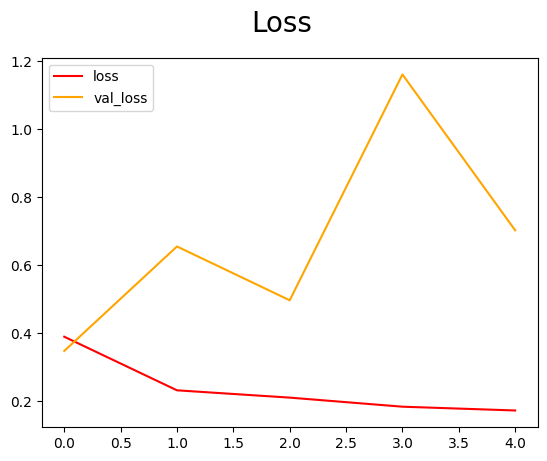

In [15]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(cnn.history.history['loss'], color='red', label='loss')
plt.plot(cnn.history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Part 4 - Making predictions

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_set = test_datagen.flow_from_directory('test', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [30]:
import numpy as np

predictions = cnn.predict_generator(test_set, steps=len(test_set), verbose=1)

y_pred = np.rint(predictions).astype(int)

labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predicted_labels = [labels[p[0]] for p in y_pred]

for file, prediction in zip(test_set.filenames, predicted_labels):
    print(f'Prediction for {file}: {prediction}')

C:\Users\Dell\AppData\Local\Temp\ipykernel_18264\1874418497.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = cnn.predict_generator(test_set, steps=len(test_set), verbose=1)


20/20 [==============================] - 4s 200ms/step
Prediction for NORMAL\IM-0001-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0003-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0005-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0006-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0007-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0009-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0010-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0011-0001-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0011-0001-0002.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0011-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0013-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0015-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0016-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0017-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0019-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0021-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0022-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0023-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0025-0001.

In [42]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

y_true = test_set.classes


f1 = f1_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print(f'F1 score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'Accuracy: {accuracy}')

F1 score: 0.6984126984126984
Recall: 0.7897435897435897
Precision: 0.6260162601626016
Accuracy: 0.5737179487179487


In [43]:
import os
import numpy as np
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from keras.preprocessing import image
import random

PNEUMONIA_PREDICTION_THRESHOLD = 0.5

def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    return 'Pneumonia' if prediction[0][0] > PNEUMONIA_PREDICTION_THRESHOLD else 'Normal'

normal_dir = 'test/NORMAL'
pneumonia_dir = 'test/PNEUMONIA'

normal_files = [os.path.join(normal_dir, f) for f in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, f) for f in os.listdir(pneumonia_dir)]

all_files = normal_files + pneumonia_files
random.shuffle(all_files)

y_true = []
y_pred = []
for f in all_files:
    prediction = predict_image(cnn, f)
    print(f'Prediction for {os.path.basename(f)}: {prediction}\n')
    y_pred.append(prediction)
    if 'NORMAL' in f:
        y_true.append('Normal')
    else:
        y_true.append('Pneumonia')

f1 = f1_score(y_true, y_pred, pos_label='Pneumonia')
recall = recall_score(y_true, y_pred, pos_label='Pneumonia')
precision = precision_score(y_true, y_pred, pos_label='Pneumonia')
accuracy = accuracy_score(y_true, y_pred)

print(f'F1 score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Accuracy: {accuracy:.2f}')


1/1 [==============================] - 0s 23ms/step
Prediction for person1632_virus_2827.jpeg: Pneumonia

1/1 [==============================] - 0s 22ms/step
Prediction for IM-0003-0001.jpeg: Normal

1/1 [==============================] - 0s 23ms/step
Prediction for person122_bacteria_582.jpeg: Pneumonia

1/1 [==============================] - 0s 23ms/step
Prediction for IM-0109-0001.jpeg: Pneumonia

1/1 [==============================] - 0s 24ms/step
Prediction for person147_bacteria_706.jpeg: Pneumonia

1/1 [==============================] - 0s 23ms/step
Prediction for person124_bacteria_591.jpeg: Pneumonia

1/1 [==============================] - 0s 21ms/step
Prediction for person78_bacteria_380.jpeg: Pneumonia

1/1 [==============================] - 0s 22ms/step
Prediction for IM-0022-0001.jpeg: Pneumonia

1/1 [==============================] - 0s 23ms/step
Prediction for person82_bacteria_404.jpeg: Pneumonia

1/1 [==============================] - 0s 23ms/step
Prediction for person